## Imports

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
from google.colab.patches import cv2_imshow
import gdown
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load Data

In [3]:
folder = "ICE 08 Pictures/"
if not os.path.isdir(folder):
    gdown.download_folder("https://drive.google.com/drive/folders/1-XJxgB9ADajgaEbHGLOETTJibSJAOxev?usp=sharing", quiet=False, use_cookies=False)
    shutil.move(folder + "cat.jpg", "cat.jpg")

Retrieving folder list


Processing file 1ZOl1vWLIHIsak2zCZWRbVhMcaOe2D8aR cat.jpg
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1ZOl1vWLIHIsak2zCZWRbVhMcaOe2D8aR
To: /content/ICE 08 Pictures/cat.jpg
100%|██████████| 67.6k/67.6k [00:00<00:00, 25.0MB/s]
Download completed


## ICE-8 Image Filtering

## (Tutorial) CNN
Feature detectors can be set up with different values to get different results.

For example, a filter can be applied that can sharpen and focus an image or blur an image. That would give equal importance to all the values. You can do edge enhancement, edge detection, and more. You would do that by applying different feature detectors to create different feature maps. The computer is able to determine which filters make the most sense and apply them.

The primary purpose here is to find features in your image, put them into a feature map, and still preserve the spatial relationship between pixels. That’s important so that the pixels don’t get all jumbled up.

* use pip install opencv-python to install cv2


Use this image https://drive.google.com/file/d/1OFAD7GGVQeKYPyp-0XZn3cxR4h9FblIz/view?usp=sharing

We’re going to use this above given image for our input image.

We’ll make it black and white

### **Upload the image above as cat.jpg in your notebook for the tutorial to work**

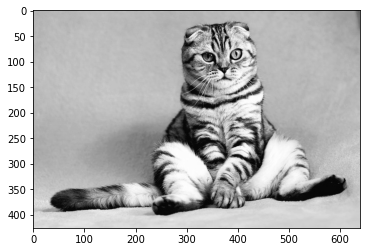

In [4]:
%matplotlib inline
img_path = 'cat.jpg'
# Load color image 
bgr_img = cv2.imread(img_path)
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255
# Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [5]:
#Let’s define and visualize our filters
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [6]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [7]:
#Now let’s define a convolutional layer (using PyTorch)
    
# Neural network with one convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # Returns both layers
        return conv_x, activated_x
    
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [8]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

## Task 1. Write code for the following tasks below :

- Plot original image
- Visualize all of the filters (4)
- Convert the image into an input tensor


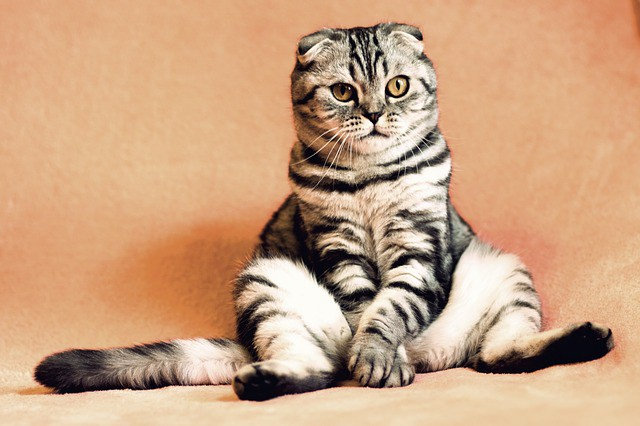

In [9]:
# View image - color
img_path = 'cat.jpg'
bgr_img = cv2.imread(img_path)
cv2_imshow(bgr_img)

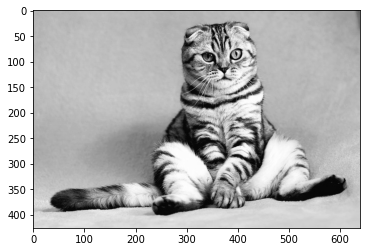

In [10]:
# View image - grayscale
plt.imshow(gray_img, cmap='gray')
plt.show()

In [11]:
# View each filter
for i, f in enumerate(filters):
    print("Filter %d:"%(i+1))
    print(f)
    print()

Filter 1:
[[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]

Filter 2:
[[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]

Filter 3:
[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]

Filter 4:
[[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]



In [12]:
# Convert image to input tensor
img_tensor = torch.tensor([[gray_img]])
img_tensor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  


tensor([[[[0.7059, 0.7059, 0.7020,  ..., 0.4275, 0.4431, 0.4863],
          [0.7020, 0.7020, 0.7020,  ..., 0.4196, 0.4275, 0.4627],
          [0.7020, 0.7020, 0.7020,  ..., 0.4118, 0.4039, 0.4314],
          ...,
          [0.8431, 0.8431, 0.8392,  ..., 0.8118, 0.8118, 0.8157],
          [0.8510, 0.8549, 0.8588,  ..., 0.8118, 0.8118, 0.8118],
          [0.8549, 0.8549, 0.8627,  ..., 0.8118, 0.8118, 0.8118]]]])

## Task 2. Write code for the following tasks below :

- Get the convolutional layer (pre and post activation)
   
   variables to use are **conv_lyr, changed_lyr**

- Visualize the output of a convolutional layer

In [13]:
# Get layers
conv_lyr, changed_lyr = model.forward(img_tensor)

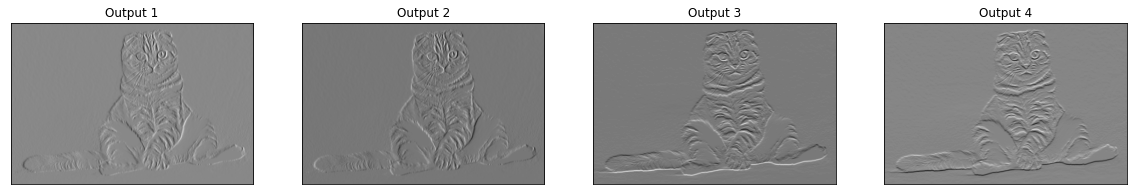

In [14]:
# Vizulize convolution layer
viz_layer(conv_lyr)

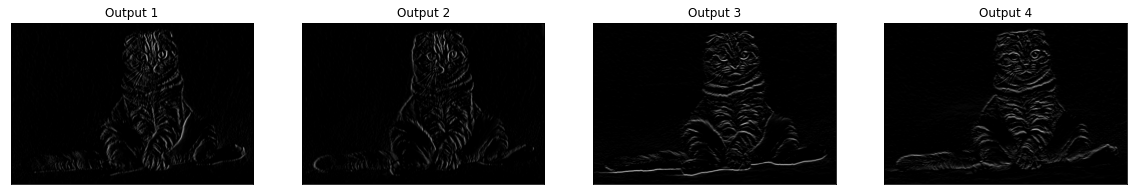

In [15]:
# Visulize activated convolution layer
viz_layer(changed_lyr)

## Task 3. Write code for the following tasks below :

### - convert image to grayscale for filtering and print it 

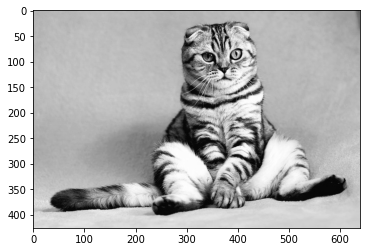

In [16]:
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32") / 255

# Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

## Task 4. Write code for the following tasks below :

 - create a custom kernel and apply edge detection filter and print it 

##HINT : Sobel operator

In [17]:
# Define Sobel filters
filter_vals = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (3, 3)


In [18]:
# Get linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# View each filter
for i, f in enumerate(filters):
    print("Filter %d:"%(i+1))
    print(f)
    print()

Filter 1:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Filter 2:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Filter 3:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

Filter 4:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]



In [19]:
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model_new = Net(weight)
# Print out the layer in the network
print(model_new)

Net(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), bias=False)
)


In [20]:
# Get layers
conv_lyr_new, changed_lyr_new = model_new.forward(img_tensor)

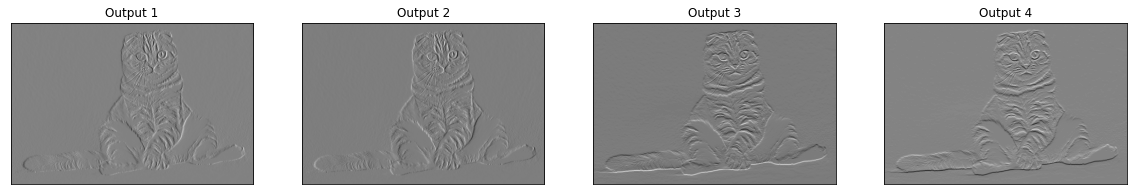

In [21]:
# Visulize convolution layer
viz_layer(conv_lyr_new)

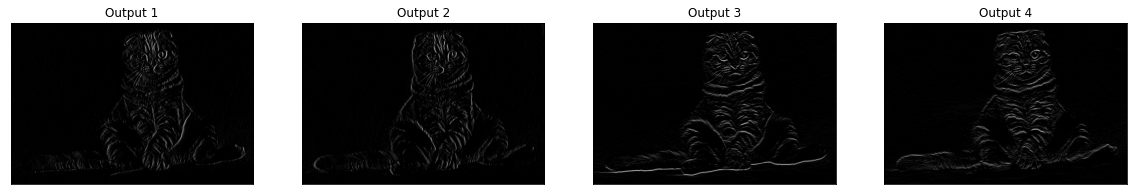

In [22]:
# Visulize activated convolution layer
viz_layer(changed_lyr_new)

## Question 1. What are different types of edge detection filters . 

State why sobel operator is useful here . 

What did we acheive from it ?

Some of the edge detection filters are Prewitt operator, Sobel operator, Roberst, Laplacian, Canny, Difference of Gaussian (DoG), and Scharr, gaussian filter, general cross-correlation, convolution, and median filters.

Sobel operators are a kind of edge detection filter that is better at picking up edges than some other filters, though not all (see Canny filters). One of the main advanatges of Sobel is that the operators are simple, and therefore one of the least computationally expensive to run.

In this notebook we retrieved the edges of the image using Sobel operators. Commparing the results to the initial filters, there is not a visible difference to the output so the main achievement is simply edge detection; it's not better than the initial filter in this particular case.

## Task 5. No need to code for this task 

### **If all tasks above are done properly this task will work**

#### HINT : read task 2 question properly as I have pointed out what variable name to use which is used in this task


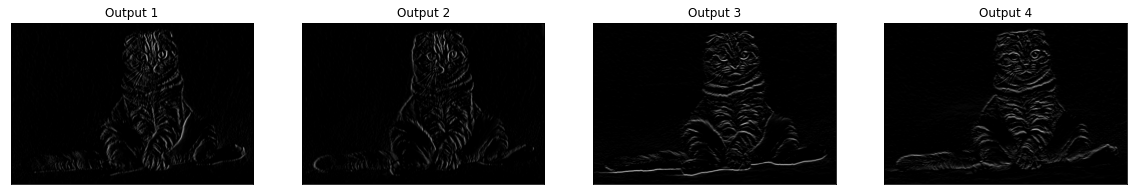

In [23]:
viz_layer(changed_lyr)

## Question 2. What are different types of edge detection filters . 
#### HINT : Please refer lecture 8 slides . 

Task 5 falls under which **building block of CNN**
Explain the importance of that block in CNN. 
Explain why that block helps in task 5 and what it did . 

Some of the edge detection filters are Prewitt operator, Sobel operator, Roberst, Laplacian, Canny, Difference of Gaussian (DoG), and Scharr, gaussian filter, general cross-correlation, convolution, and median filters.

Task 5 deals with the ReLU layer building block of the CNN. ReLU blocks convert data that can possibly contain negative values into positive values. One of the main functions of a ReLU block is to introduce non-linearity into a model, which allows the model to perform complicated tasks in many directions.

In task 5 the ReLU block converted the grayscale layer output into a mostly-black image with grayscale/white values in locations where the lines occur in the image. This conversion also reduced some of the minor variations in the image, resulting in sharper edges but smoother non-edge sections. This helped make it much clearer where the edges in the image were, as the grayscale output of the convolution block was less defined in many areas of the image.